# Iris dataset

## Bibliotecas

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Importando o dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [3]:
dataset = pd.read_csv(url, names=names)

In [4]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset['Class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Processamento dos dados

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Normalização

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

---

# LDA

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

## Escolhendo o número de compontentes

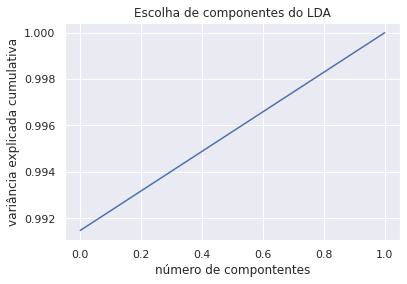

In [11]:
lda = LDA().fit(X, y)
plt.plot(np.cumsum(lda.explained_variance_ratio_))

plt.title('Escolha de componentes do LDA')
plt.xlabel('número de compontentes')
plt.ylabel('variância explicada cumulativa')

plt.show()

## Executando o LDA

In [12]:
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

## Treinando o "Random Forest" como classificador

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
classifier = RandomForestClassifier(max_depth=2, random_state=42)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

### Avaliando a performance

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#### Relatório da classificação

In [16]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



#### Matriz de confusão

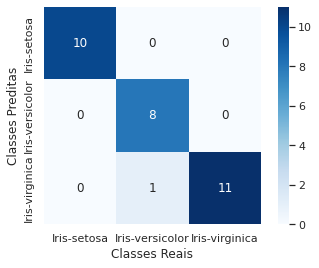

In [17]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_pred),
            cmap=plt.cm.Blues)
plt.xlabel('Classes Reais')
plt.ylabel('Classes Preditas');

#### Acurácia

In [18]:
acc = accuracy_score(y_test, y_pred)

print(f'Acurácia de {round(acc, 2)*100}%')

Acurácia de 97.0%


---

# PCA

In [19]:
from sklearn.decomposition import PCA

## Escolhendo o número de compontentes

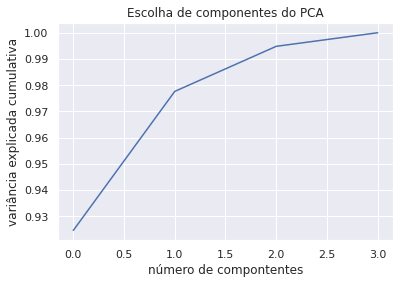

In [20]:
pca = PCA().fit(X, y)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.title('Escolha de componentes do PCA')
plt.xlabel('número de compontentes')
plt.ylabel('variância explicada cumulativa')

plt.show()

## Executando o PCA

In [21]:
pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Treinando o "Random Forest" como classificador

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
classifier = RandomForestClassifier(max_depth=2, random_state=42)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

### Avaliando a performance

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#### Relatório da classificação

In [25]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



#### Matriz de confusão

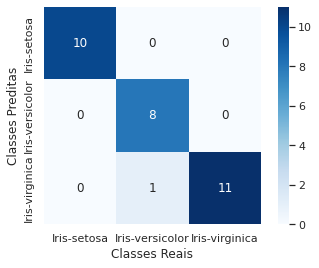

In [26]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_pred),
            cmap=plt.cm.Blues)
plt.xlabel('Classes Reais')
plt.ylabel('Classes Preditas');

#### Acurácia

In [27]:
acc = accuracy_score(y_test, y_pred)

print(f'Acurácia de {round(acc, 2)*100}%')

Acurácia de 97.0%
